In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [117]:
RANDOM_SEED = 257

In [10]:
train = pd.read_csv("data/train.csv")
#test = pd.read_csv("data/test.csv")

### Classes sizes

In [6]:
train["label"].value_counts()

0    860
2    658
1    196
Name: label, dtype: int64

### Check whether we have clusters within classes

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

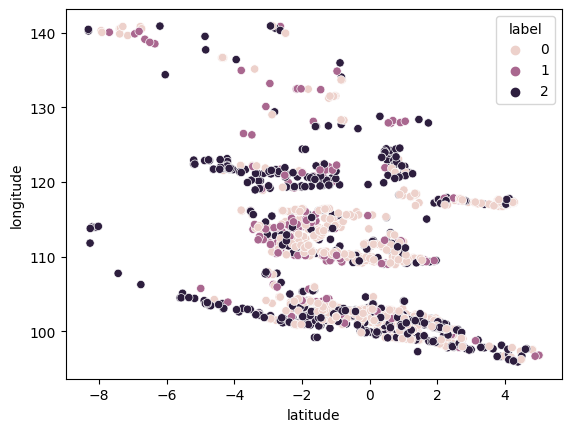

In [92]:
sns.scatterplot(data=train, x='latitude', y='longitude', hue='label')

In [88]:
train[["year", "label"]].value_counts().reset_index().sort_values(by="year")

,year,label,0
36,2001,2,12
29,2001,0,29
34,2002,2,22
26,2002,0,33
30,2003,0,26
35,2003,2,19
17,2004,2,48
24,2004,0,37
21,2005,2,44
12,2005,0,51


In [104]:
X, y = train[['latitude', 'longitude']], train['label']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED, stratify=y)

In [119]:
dt = DecisionTreeClassifier(random_state=0, max_depth=5)

In [120]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

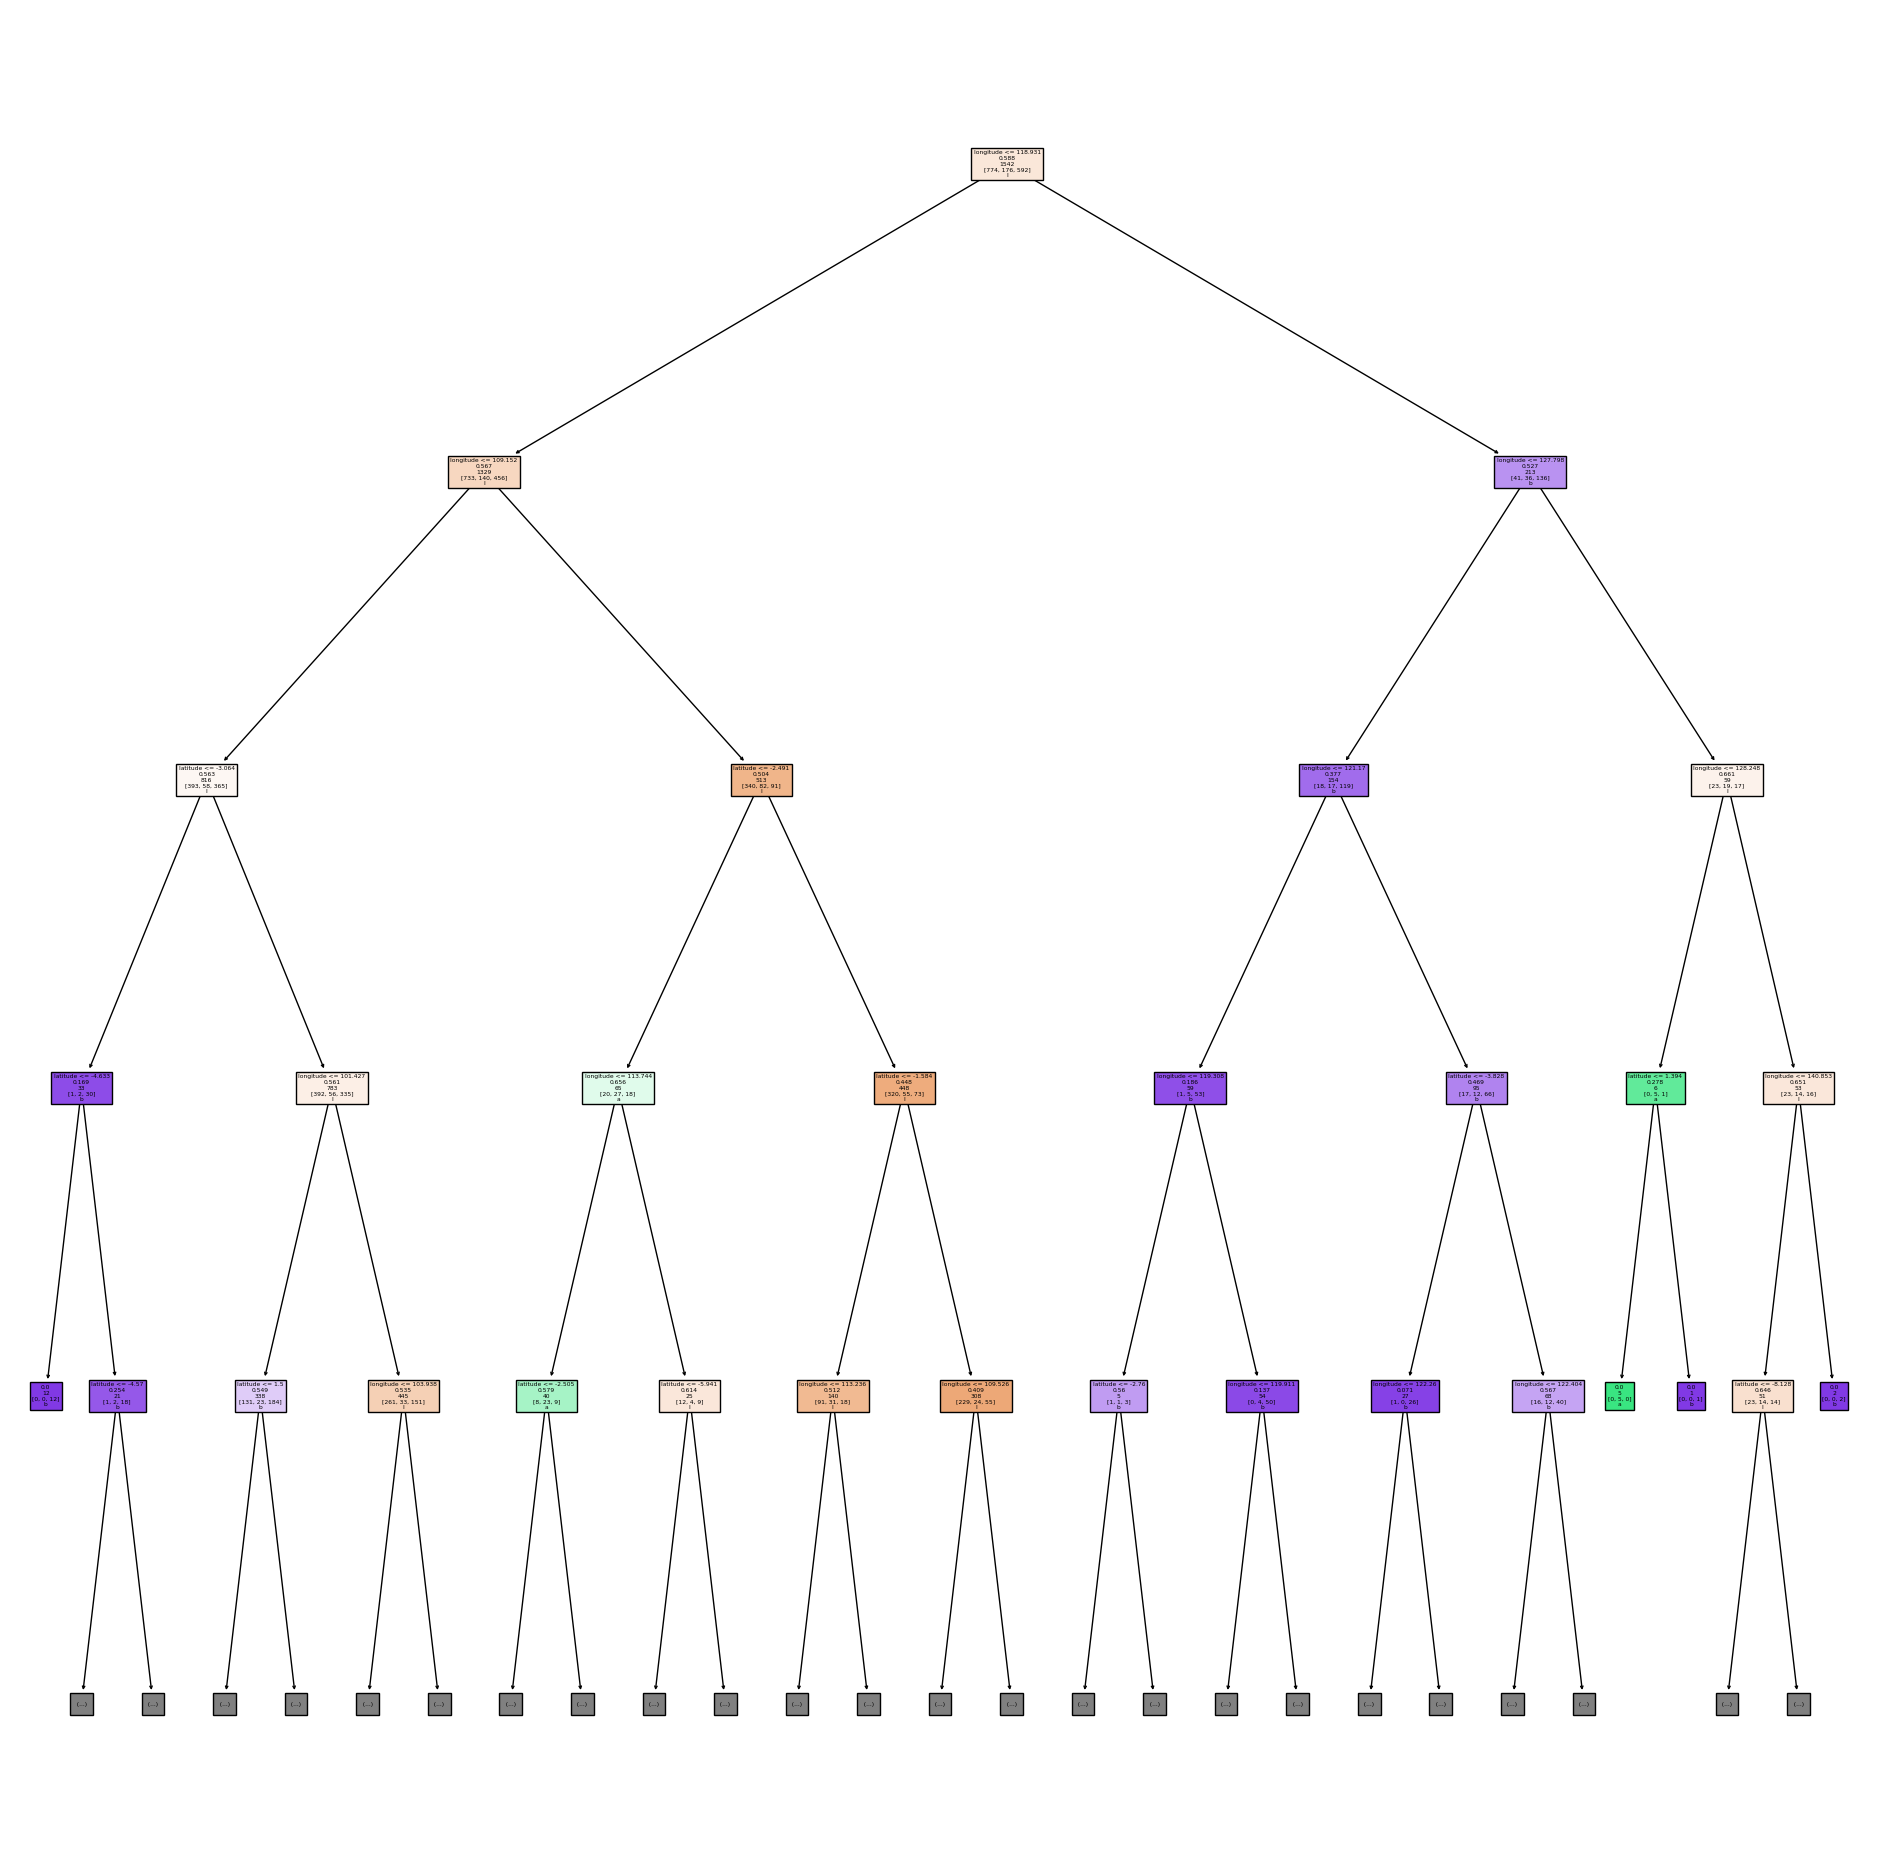

In [121]:
plt.figure(figsize=(24,24))
tree.plot_tree(dt, feature_names=['latitude', 'longitude'], class_names='label', filled=True, label=None, max_depth=4)
plt.savefig("decision_tree_max_depth_5.pdf")

In [122]:
dt_preds = dt.predict(X_test)

In [123]:
f1_score(y_test, dt_preds, average="macro")

0.4700002548614828